# Breast Cancer Wisconsin (Diagnostic) Data Set

Predict whether the cancer is benign or malignant

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Importing the required Library

In [ ]:
# To read csv file 
import pandas as pd

import numpy as np

# Avoid Warning messages 
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

# Scaling Library
from sklearn.preprocessing import PowerTransformer


# Ensemble technique
import xgboost 

!pip install catboost
from catboost import CatBoostClassifier

# Metrics
from sklearn import metrics

In [ ]:
names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 
'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 
'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

In [ ]:
data_set = pd.read_csv('/content/drive/My Drive/Dataset/Sezzle/data.csv',
                   names = names)

df = data_set.copy()
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Descriptive Analysis

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**area_worst** - In Max, it consists of 4254, the 75percentile is 1084 and the median is 686, the median and 75percentile is almost nearer but there is more variation betweeen Max and 75percentile approximately equal to 3200. So it shows that the presence of outlier and the right skew possibilities

**perimeter_worst** - In Max, it consists of 251.2, the 75percentile is 125.4 and the median is 97.66, the median and 75percentile is almost nearer but there is more variation betweeen Max and 75percentile. So it shows that the presence of outlier and the right skew possibilities

**area_mean** - In Max, it consists of 2501 and the 75percentile is 782. So it shows that the presence of outlier and the right skew possibilities 

**radius_se** - In Max, it consists of 2.87 and the 75percentile is 0.47. So it shows that the presence of outlier and the right skew possibilities

**texture_se** -  In Max, it consists of 4.88, the 75percentile is 1.47 and the median is 1.1, the median and 75percentile is almost nearer but there is more variation betweeen Max and 75percentile. So it shows that the presence of outlier and the right skew possibilities

**perimeter_se** -  In Max, it consists of 21.98, the 75percentile is 3.35 and the median is 2.28, the median and 75percentile is almost nearer but there is more variation betweeen Max and 75percentile. So it shows that the presence of outlier and the right skew possibilities

**area_se** -  In Max, it consists of 542.20, the 75percentile is 45.19 and the median is 24.53, the median and 75percentile is almost nearer but there is more variation betweeen Max and 75percentile approximately equal to 498. So it shows that the presence of outlier and the right skew possibilities

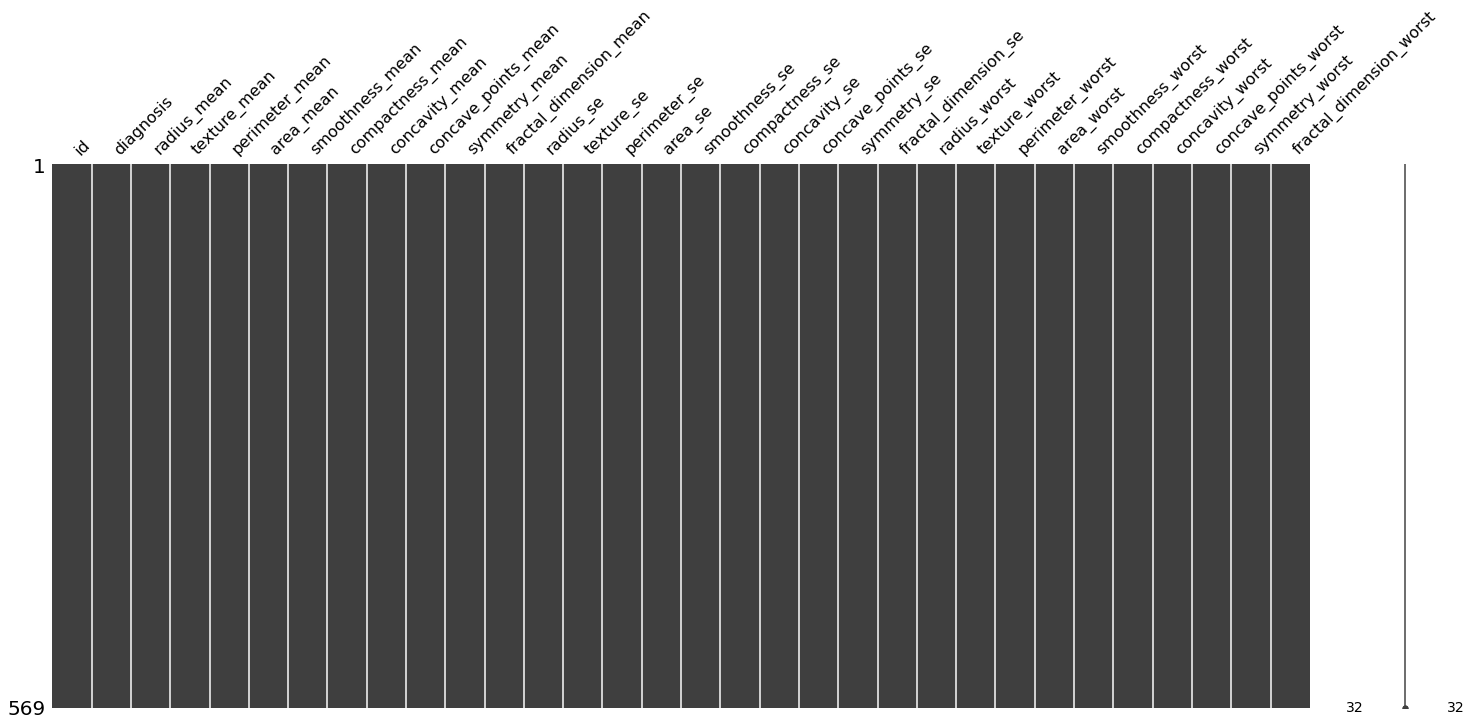

In [ ]:
import missingno as msn
msn.matrix(df)

The above plot is so helpful for finding the NAN value in the feature, it shows that dataset consists of no NAN values 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

The above output shows that there is no **NAN** value and the data type are except diagnosis everything are int and float. Since diagnosis is the target variable and consist of **M** and **B** it is encoded to 1 and 0.

In [ ]:
df.shape

(569, 32)

In [ ]:
# Since it is the target value and binary classification, it is encoded as B--->0, M--->1

df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [0,1])
df['diagnosis'].unique()

array([1, 0])

In [ ]:
# Creating the function to find the number of unique values in each feature,
# So that it gives whether the feature is continuous of classification type

def nunique_values(data):
  for i in data.columns:
    print(i,' columns has : ', data[i].nunique())

    

In [ ]:
nunique_values(df)

id  columns has :  569
diagnosis  columns has :  2
radius_mean  columns has :  456
texture_mean  columns has :  479
perimeter_mean  columns has :  522
area_mean  columns has :  539
smoothness_mean  columns has :  474
compactness_mean  columns has :  537
concavity_mean  columns has :  537
concave_points_mean  columns has :  542
symmetry_mean  columns has :  432
fractal_dimension_mean  columns has :  499
radius_se  columns has :  540
texture_se  columns has :  519
perimeter_se  columns has :  533
area_se  columns has :  528
smoothness_se  columns has :  547
compactness_se  columns has :  541
concavity_se  columns has :  533
concave_points_se  columns has :  507
symmetry_se  columns has :  498
fractal_dimension_se  columns has :  545
radius_worst  columns has :  457
texture_worst  columns has :  511
perimeter_worst  columns has :  514
area_worst  columns has :  544
smoothness_worst  columns has :  411
compactness_worst  columns has :  529
concavity_worst  columns has :  539
concave_points

In [ ]:
# Dropping the id columns, since all the values are unique here
del df['id']


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Explanatory Data Analysis

### Calculating the correlation of the feature

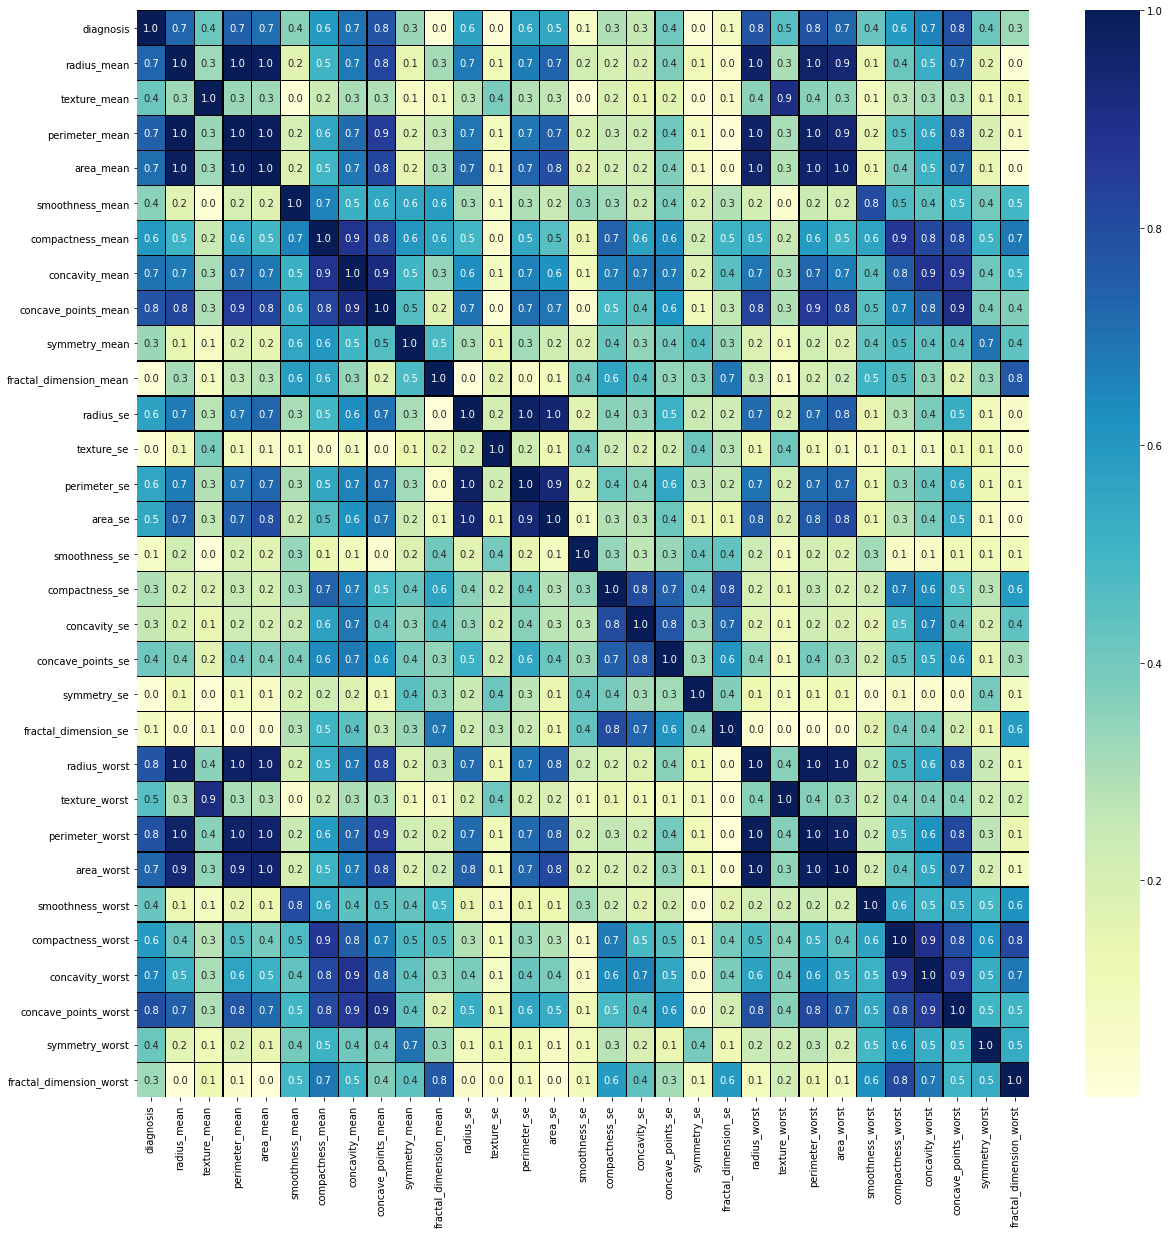

In [ ]:
corr = df.corr().abs()
plt.subplots(figsize=(20,20))
sns.heatmap(corr,
            fmt='.1f',
            linewidth=0.2,
            linecolor='black',
            annot = True,
            cmap="YlGnBu"
            )

From the above matrix plot, a few features are highly correlated ie more than 0.95, it will lead to the overfitting problem and the feature which has highly correlated need to be treated properly.

### Checking the Target feature counts 

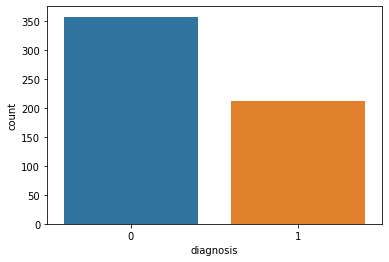

In [ ]:
sns.countplot(df.diagnosis)

**From the above plot it shows that the 2 classes are imbalaced**

In [ ]:
# Here the data was separated with respect to the class and analysed accordingly 

# Malignant class = 1 

class_1 = df[df.diagnosis == 1]

# Benign class = 0
class_0 = df[df.diagnosis == 0]

In [ ]:
class_0.shape

(357, 31)

In [ ]:
print('The percentage of the class_0 is :', round(class_0.shape[0]/ df.shape[0] *100),'%')
print('The percentage of the class_1 is :', round(class_1.shape[0]/ df.shape[0] *100),'%')

The percentage of the class_0 is : 63 %
The percentage of the class_1 is : 37 %


Since the size of the data is very small and the classes in the Target feature are imbalanced, So it is necessary to balance the classes of the Target feature or else model trained majorly on Class_0 and starts perdictingo only the class_0 for most the inputs

In [ ]:
outcome_0 = round(class_0.describe(),2)
outcome_1 = round(class_1.describe(),2)

In [ ]:
outcome_0

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,357.0,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.00,357.0,357.00,357.00,357.00,357.00,357.00,357.00
mean,0.0,12.15,17.91,78.08,462.79,0.09,0.08,0.05,0.03,0.17,0.06,0.28,1.22,2.00,21.14,0.01,0.02,0.03,0.01,0.02,0.00,13.38,23.52,87.01,558.9,0.12,0.18,0.17,0.07,0.27,0.08
std,0.0,1.78,4.00,11.81,134.29,0.01,0.03,0.04,0.02,0.02,0.01,0.11,0.59,0.77,8.84,0.00,0.02,0.03,0.01,0.01,0.00,1.98,5.49,13.53,163.6,0.02,0.09,0.14,0.04,0.04,0.01
min,0.0,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,0.05,0.11,0.36,0.76,6.80,0.00,0.00,0.00,0.00,0.01,0.00,7.93,12.02,50.41,185.2,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.0,11.08,15.15,70.87,378.20,0.08,0.06,0.02,0.02,0.16,0.06,0.21,0.80,1.44,15.26,0.01,0.01,0.01,0.01,0.02,0.00,12.08,19.58,78.27,447.1,0.11,0.11,0.08,0.05,0.24,0.07
50%,0.0,12.20,17.39,78.18,458.40,0.09,0.08,0.04,0.02,0.17,0.06,0.26,1.11,1.85,19.63,0.01,0.02,0.02,0.01,0.02,0.00,13.35,22.82,86.92,547.4,0.13,0.17,0.14,0.07,0.27,0.08
75%,0.0,13.37,19.76,86.10,551.10,0.10,0.10,0.06,0.03,0.19,0.07,0.34,1.49,2.39,25.03,0.01,0.03,0.03,0.01,0.02,0.00,14.80,26.51,96.59,670.0,0.14,0.23,0.22,0.10,0.30,0.09
max,0.0,17.85,33.81,114.60,992.10,0.16,0.22,0.41,0.09,0.27,0.10,0.88,4.88,5.12,77.11,0.02,0.11,0.40,0.05,0.06,0.03,19.82,41.78,127.10,1210.0,0.20,0.58,1.25,0.18,0.42,0.15


In [ ]:
outcome_1

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00,212.00
mean,1.0,17.46,21.60,115.37,978.38,0.10,0.15,0.16,0.09,0.19,0.06,0.61,1.21,4.32,72.67,0.01,0.03,0.04,0.02,0.02,0.00,21.13,29.32,141.37,1422.29,0.14,0.37,0.45,0.18,0.32,0.09
std,0.0,3.20,3.78,21.85,367.94,0.01,0.05,0.08,0.03,0.03,0.01,0.35,0.48,2.57,61.36,0.00,0.02,0.02,0.01,0.01,0.00,4.28,5.43,29.46,597.97,0.02,0.17,0.18,0.05,0.07,0.02
min,1.0,10.95,10.38,71.90,361.60,0.07,0.05,0.02,0.02,0.13,0.05,0.19,0.36,1.33,13.99,0.00,0.01,0.01,0.01,0.01,0.00,12.84,16.67,85.10,508.10,0.09,0.05,0.02,0.03,0.16,0.06
25%,1.0,15.08,19.33,98.74,705.30,0.09,0.11,0.11,0.06,0.17,0.06,0.39,0.89,2.72,35.76,0.01,0.02,0.03,0.01,0.01,0.00,17.73,25.78,119.33,970.30,0.13,0.24,0.33,0.15,0.28,0.08
50%,1.0,17.33,21.46,114.20,932.00,0.10,0.13,0.15,0.09,0.19,0.06,0.55,1.10,3.68,58.46,0.01,0.03,0.04,0.01,0.02,0.00,20.59,28.94,138.00,1303.00,0.14,0.36,0.40,0.18,0.31,0.09
75%,1.0,19.59,23.76,129.93,1203.75,0.11,0.17,0.20,0.10,0.21,0.07,0.76,1.43,5.21,94.00,0.01,0.04,0.05,0.02,0.02,0.00,23.81,32.69,159.80,1712.75,0.16,0.45,0.56,0.21,0.36,0.10
max,1.0,28.11,39.28,188.50,2501.00,0.14,0.35,0.43,0.20,0.30,0.10,2.87,3.57,21.98,542.20,0.03,0.14,0.14,0.04,0.08,0.01,36.04,49.54,251.20,4254.00,0.22,1.06,1.17,0.29,0.66,0.21


From the above two tables of outcome_0 and outcome_1, it gives a clear understanding that the most of the outlier were belongs to **Outcome_1** which is **Malignant**, the features like radius, perimeter, texture becomes larger than the **Benign**

### univariate Analysis

The Below graphs gives the distribution of the data which is separated based on their classes and analysed

Text(1, 2, 'Outcome 0 (Benign patient) Univariate Plots')

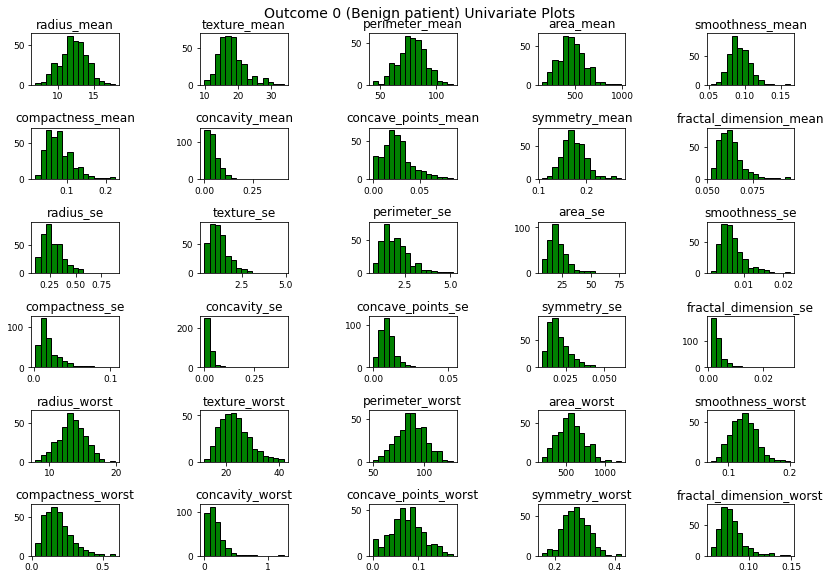

In [ ]:
class_0 = class_0.drop('diagnosis', axis=1)

class_0.hist(bins=15, 
             color='green', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot

plt.suptitle('Outcome 0 (Benign patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
             fontsize=14)

Text(1, 2, 'Outcome 1 (Malignant patient) Univariate Plots')

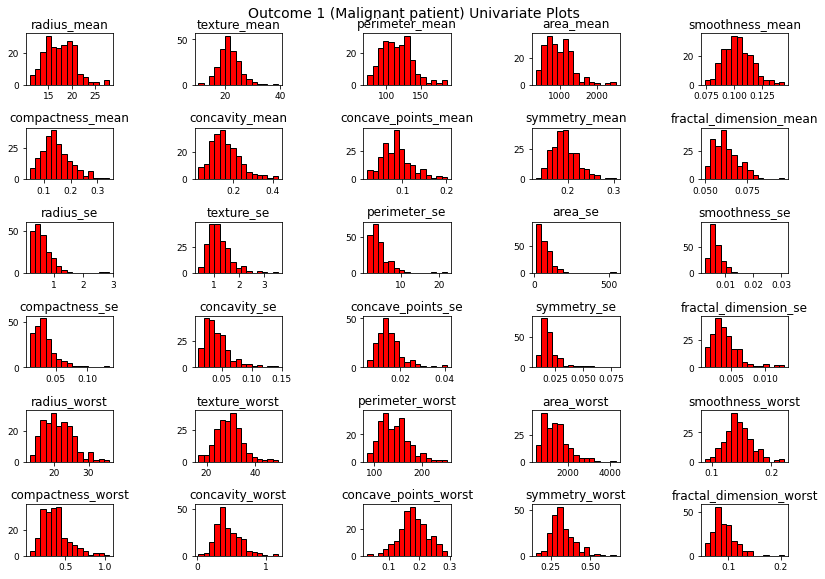

In [ ]:
class_1 = class_1.drop('diagnosis', axis=1)

class_1.hist(bins=15, 
             color='red', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot

plt.suptitle('Outcome 1 (Malignant patient) Univariate Plots',
             x=1, # title x position
             y=2, # title y position
             fontsize=14)

### Checking for the outliers using the box plot 

Here except 'Diagnosis' feature everything was a continuous feature, So Diagnosis feature is removed and checked for the outliers..

In [ ]:
df_box = df.drop('diagnosis',axis=1)

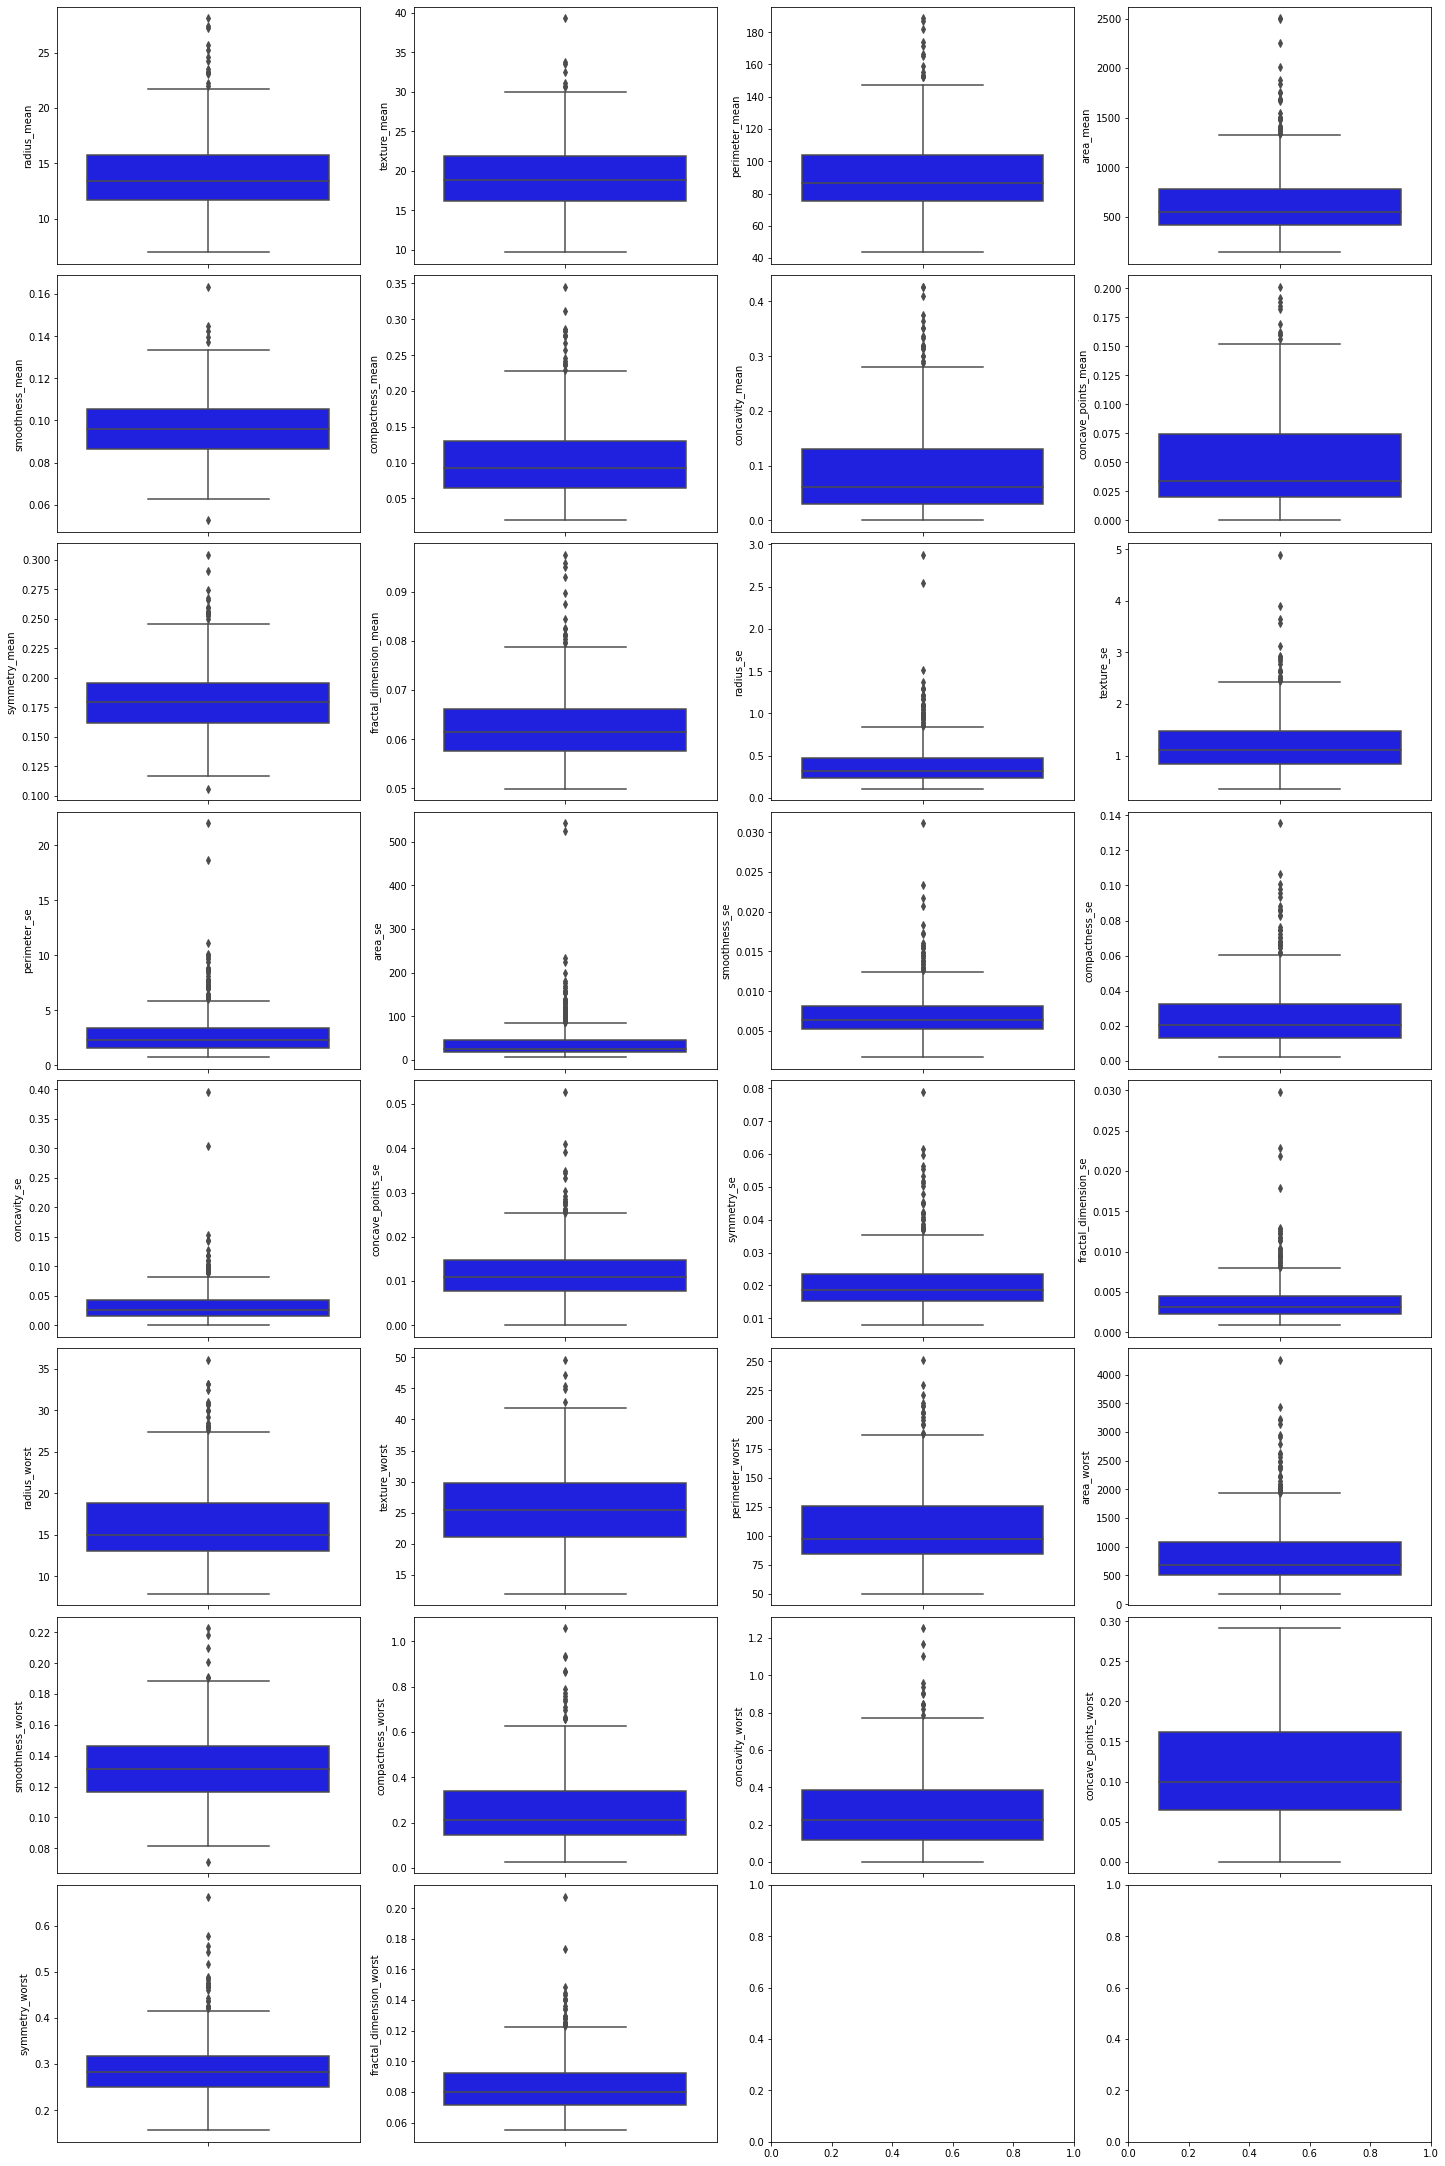

In [ ]:
fig , ax = plt.subplots(nrows= 8,       # no,of plots comes in row wise 
                        ncols= 4,       # no,of plots comes in column wise 
                        figsize=(20,30) # size of plot
                        )
ax = ax.flatten() # It returns a flattened version of the array, to avoid numpy.ndarray
index = 0
for i in df_box.columns:
  sns.boxplot(y=i,data = df_box, ax=ax[index],color='blue')
  index += 1
plt.tight_layout(pad=0.4)

In [ ]:
'''
sns.pairplot(df,              # dataset
             hue='diagnosis',   # variable in dataset to map plot aspects to different color
             palette='husl',
             )'''

"\nsns.pairplot(df,              # dataset\n             hue='diagnosis',   # variable in dataset to map plot aspects to different color\n             palette='husl',\n             )"

The Below graphs gives the distribution of the data

Text(1, 2, 'Univariate Plots')

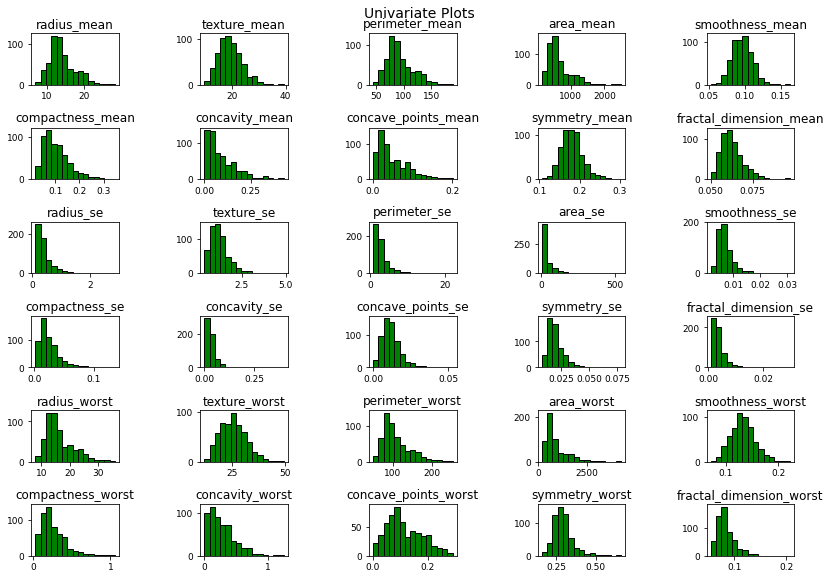

In [ ]:
df_univ = df.drop('diagnosis', axis=1)

df_univ.hist(bins=15, 
             color='green', 
             edgecolor='black', 
             linewidth=1.0,
             xlabelsize=9, 
             ylabelsize=9, 
             grid=False)    

plt.tight_layout(rect=(0, 0, 2, 2)) # it will change the size of the plot

plt.suptitle('Univariate Plots',
             x=1, # title x position
             y=2, # title y position
             fontsize=14)

In [ ]:
# Finding the skewness and kurtosis of each feature 

highly_skewed = []
def data_skewness(data):


  for i in data.columns:
    if data[i].skew() > 1 or data[i].skew() <-1:
      highly_skewed.append(i)
    print(i)
    print('Skewness for',i,'feature = %.3f' %data[i].skew())
    print('kurtosis for',i,'feature = %.3f' %data[i].kurtosis())
    print('----------------------------------------------------')

data_skewness(df_univ)

radius_mean
Skewness for radius_mean feature = 0.942
kurtosis for radius_mean feature = 0.846
----------------------------------------------------
texture_mean
Skewness for texture_mean feature = 0.650
kurtosis for texture_mean feature = 0.758
----------------------------------------------------
perimeter_mean
Skewness for perimeter_mean feature = 0.991
kurtosis for perimeter_mean feature = 0.972
----------------------------------------------------
area_mean
Skewness for area_mean feature = 1.646
kurtosis for area_mean feature = 3.652
----------------------------------------------------
smoothness_mean
Skewness for smoothness_mean feature = 0.456
kurtosis for smoothness_mean feature = 0.856
----------------------------------------------------
compactness_mean
Skewness for compactness_mean feature = 1.190
kurtosis for compactness_mean feature = 1.650
----------------------------------------------------
concavity_mean
Skewness for concavity_mean feature = 1.401
kurtosis for concavity_mea

In [ ]:
highly_skewed

['area_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'compactness_worst',
 'concavity_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Here on overall perspective, most of the features are right skewed and the reason is due to the data of Malignant stage.

So the outliers cannot removed here, so we use Power tranformers for Scaling technique and Boost ensemble model to predict the target variable 

### Treating the Highly corelated features

Removing the highly co-related variable, it avoids the overfitting due to multicollinerity 

In [ ]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [ ]:
to_drop

['perimeter_mean',
 'area_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'perimeter_worst',
 'area_worst']

In [ ]:
df = df.drop(df[to_drop], axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,17.33,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,23.41,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,25.53,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,26.50,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,16.67,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Oversampling of Data

In [ ]:
from imblearn.over_sampling import SMOTE 
smt = SMOTE(sampling_strategy='auto', random_state=9,n_jobs=-1)
x = df.drop(['diagnosis'],axis = 1)
y = df.diagnosis
x, y = smt.fit_sample(x,y)

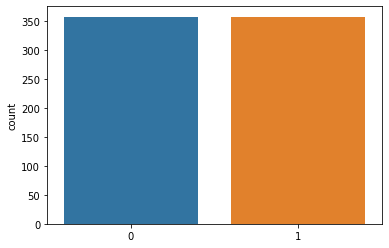

In [ ]:
sns.countplot(y)

Here the data is completely in balanced state

### Scaling the features

In [ ]:
scaling_feature =  ['radius_mean', 'texture_mean', 'texture_worst']

In [ ]:
pt = PowerTransformer(method = 'yeo-johnson')

In [ ]:
for i in df.columns:
  if i  in scaling_feature:
    df[i] = pt.fit_transform(df[[i]])
    #x_test[i] = pt.transform(x_test[[i]])

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.134881,-2.678666,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,-1.488367,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1.619346,-0.264377,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,-0.288382,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,1.464796,0.547806,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.071406,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,-0.759262,0.357721,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.228089,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,1.571260,-1.233520,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,-1.637882,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Hold-out Method

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

print(x_train.shape)
print()
print(x_test.shape)
print()
print(y_train.shape)
print()
print(y_test.shape)

(571, 23)

(143, 23)

(571,)

(143,)


### Deploying into the ML model

#### XGBoost Technique

In [ ]:
xgb = xgboost.XGBClassifier(objective = 'binary:logistic',
                            n_jobs=-1,
                            random_state =9)

In [ ]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=9,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pred_xgb = xgb.predict(x_test)

In [ ]:
print('Accuracy of the XGBoost model :',metrics.accuracy_score(y_test,pred_xgb))

Accuracy of the XGBoost model : 0.9790209790209791


In [ ]:
# Confusion Matrix for XGBoost model 

metrics.confusion_matrix(y_test,pred_xgb)

array([[64,  2],
       [ 1, 76]])

Confusion Matrix gives the counts of how the model predicts the TP, FP, TN, FN, so that it gives the metrics of Recall and Precision.

Since it is a medical related problem, then number of False negative / Type 2 error should be taken care in such a way.

Here in XGBoost the FN is 1

#### Cat Boosting technique

In [ ]:
cat = CatBoostClassifier(iterations=400,
                           depth=2,
                           learning_rate=0.1,
                           loss_function='Logloss',
                           verbose=True)

In [ ]:
cat.fit(x_train,y_train)

0:	learn: 0.5883249	total: 50.8ms	remaining: 20.3s
1:	learn: 0.5109454	total: 52.4ms	remaining: 10.4s
2:	learn: 0.4493173	total: 53.8ms	remaining: 7.12s
3:	learn: 0.3722306	total: 55.2ms	remaining: 5.46s
4:	learn: 0.3329939	total: 56.6ms	remaining: 4.47s
5:	learn: 0.2999228	total: 58ms	remaining: 3.81s
6:	learn: 0.2683274	total: 59.3ms	remaining: 3.33s
7:	learn: 0.2354058	total: 60.6ms	remaining: 2.97s
8:	learn: 0.2235526	total: 62ms	remaining: 2.69s
9:	learn: 0.2052156	total: 63.5ms	remaining: 2.48s
10:	learn: 0.1879657	total: 64.8ms	remaining: 2.29s
11:	learn: 0.1751339	total: 66.2ms	remaining: 2.14s
12:	learn: 0.1692843	total: 67.5ms	remaining: 2.01s
13:	learn: 0.1633813	total: 68.8ms	remaining: 1.9s
14:	learn: 0.1541320	total: 70.2ms	remaining: 1.8s
15:	learn: 0.1508434	total: 71.6ms	remaining: 1.72s
16:	learn: 0.1466462	total: 72.9ms	remaining: 1.64s
17:	learn: 0.1403626	total: 74.2ms	remaining: 1.57s
18:	learn: 0.1344323	total: 75.6ms	remaining: 1.51s
19:	learn: 0.1310399	total: 

In [ ]:
pred_cat = cat.predict(x_test)

In [ ]:
metrics.accuracy_score(y_test,pred_cat)

0.986013986013986

In [ ]:
# Confusion Matrix for XGBoost model 

metrics.confusion_matrix(y_test,pred_cat)

array([[65,  1],
       [ 1, 76]])

Here in CatBoost the FN is 1 and the accuracy is also more precise

<Figure size 432x288 with 0 Axes>

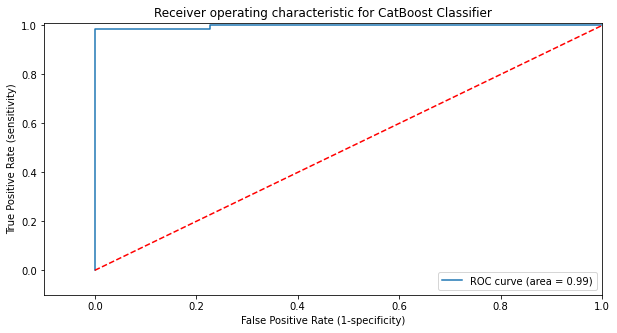

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test, cat.predict_proba(x_test)[:,1])
cat_roc = metrics.roc_auc_score(pred_cat,y_test)
plt.figure()
plt.subplots(figsize=(10,5))
plt.plot(fpr, tpr, label = 'ROC curve (area = %0.2f)'%cat_roc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.xlabel('False Positive Rate (1-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('Receiver operating characteristic for CatBoost Classifier')
plt.legend(loc ="lower right")
plt.show()

In above AUC-ROC, Espicially when dealing with the **HEALTHCARE** problems, the factor **True Positive Rate (sensitivity) VS False Positive Rate (1-specificity)** the area under the curve it shows how exactly model try to predicts the target feature exactly.

Here in my dataset, the few features were skewed and has outliers, because of data range is very small, when tried to transform the data for removing the skewness, the tranformation doesn't add much value to the features. For treating the outliers, the size of the data very less so it cannot be removed and it cannot be able to bin / cap the datas in each feature. So this the reason **ENSEMBLE TECHNIQUE** is used here.